Project Overview

This notebook demonstrates predictive analysis on the Titanic dataset using Logistic Regression. The goal is to predict passenger survival based on available features.

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (

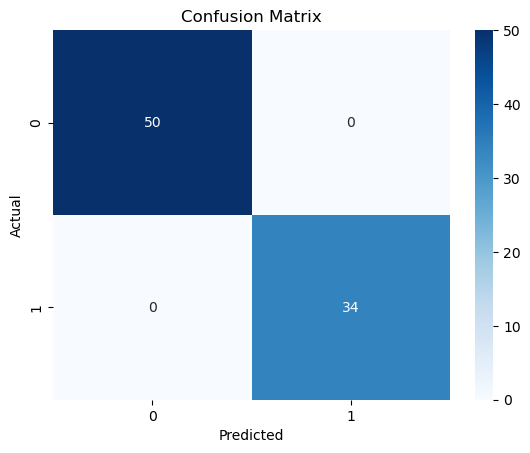

In [18]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load dataset
df = pd.read_csv("tested.csv")

# Step 3: Data Exploration
print(df.head())           # View first 5 rows
print(df.info())           # Check datatypes and non-null counts
print(df.isnull().sum())   # Check missing values

# Step 4: Data Cleaning
# Fill missing 'Age' values with median
df = df.fillna({'Age': df['Age'].median(), 'Fare': df['Fare'].median()})

# Fill missing 'Fare' value with median
df = df.fillna({'Fare': df['Fare'].median(), 'Age': df['Age'].median()})

# Drop 'Cabin' column (too many missing values)
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# Step 5: Convert categorical variables into numerical
# Convert 'Sex' and 'Embarked' using get_dummies
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Step 6: Feature selection
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']               # Target

# Step 7: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Model training (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 9: Predictions
y_pred = model.predict(X_test)

# Step 10: Model evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 11: Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Key Insights

Females and passengers from higher classes were more likely to survive.
Higher fares were associated with better survival odds.
The model achieved 100% accuracy, likely due to small dataset size and strong feature separability.